In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('ParisHousing.csv')

In [3]:
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [4]:
x = data[['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors', 'cityCode', 
                 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 
                 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom']]


y = data['price']


In [5]:
x = x.drop(['attic'], axis=1)

In [6]:
x.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,garage,hasStorageRoom,hasGuestRoom
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,956,0,7
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,128,1,2
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,135,1,9
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,359,0,3
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,292,1,4


In [7]:
from math import ceil
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

sns.set_context("talk")
sns.set_style("white")

In [9]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

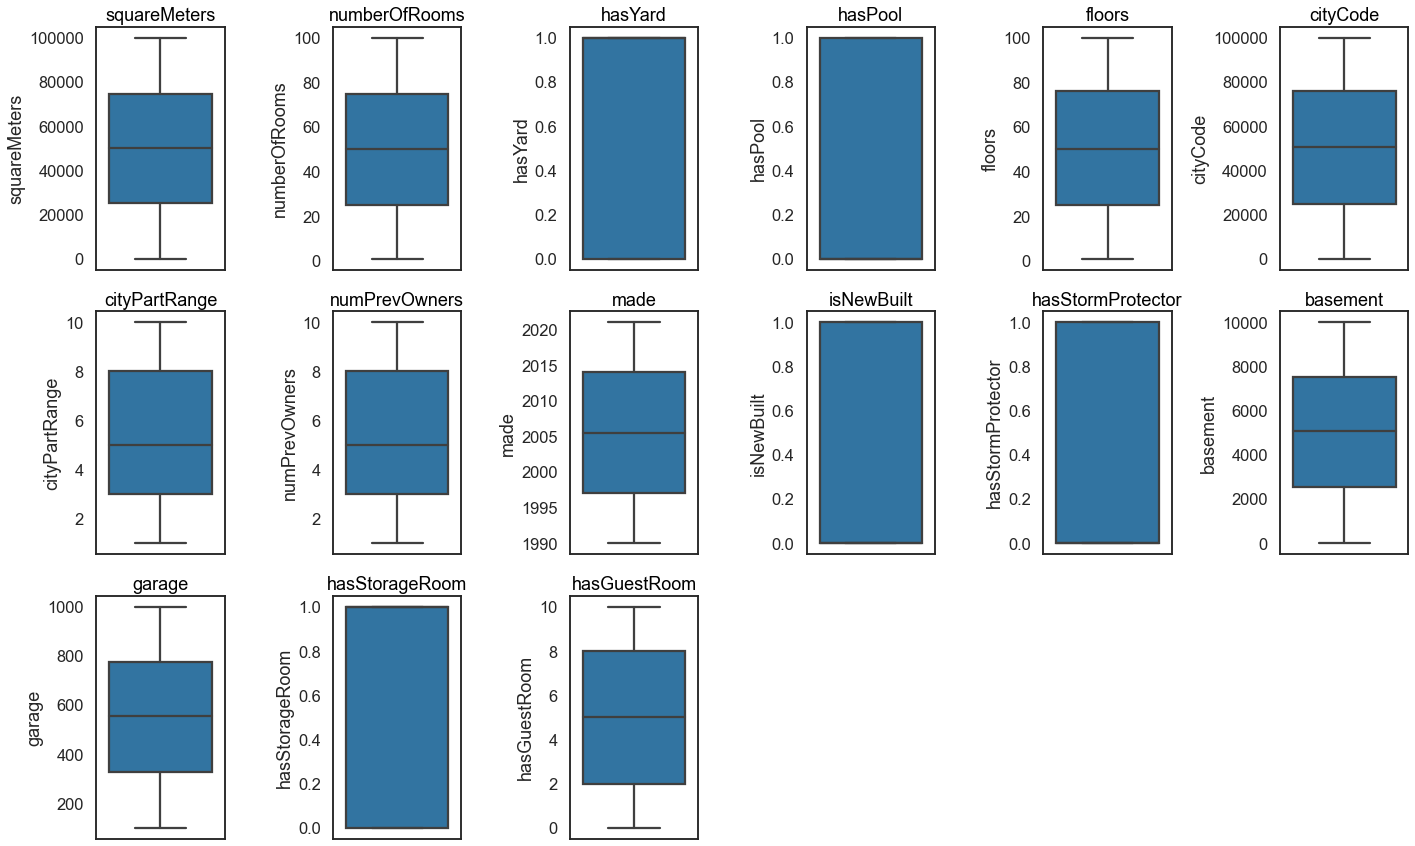

In [11]:
num_cols = X_test.columns.to_list()

def box_plot(dataframe, features, rows, cols): 
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.boxplot(y=dataframe[feature],data=X_train)
        ax.set_title(feature,color='black')
    fig.tight_layout()  
    plt.show()

box_plot(data,num_cols,5,6)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 3694196.616662998
R-squared: 0.9999995782281639


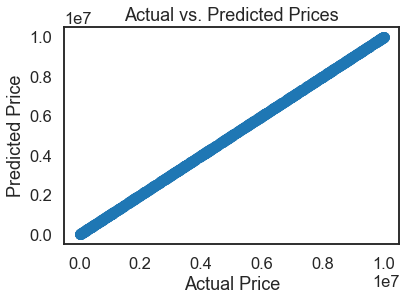

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()